In [22]:
import pandas as pd
import random
import os
import re

In [11]:
def extract_protein_name(file_path):
    # Using regular expression to extract the part after "pfam_" and before ".csv"
    match = re.search(r'pfam_(.*?)\.csv', file_path)
    if match:
        return match.group(1)  # Return the matched part (e.g., "dhfr")
    else:
        return os.path.splitext(os.path.basename(file_path))[0] 

In [14]:
file_paths = ["../../ProtWaveVAE/Pfam_analysis/data/protein_families/DHFR/pfam_DHFR.csv", 
              "../../ProtWaveVAE/Pfam_analysis/data/protein_families/G_protein/pfam_G_protein.csv", 
              "../../ProtWaveVAE/Pfam_analysis/data/protein_families/lactamase/pfam_lactamase.csv", 
              "../../ProtWaveVAE/Pfam_analysis/data/protein_families/S1A/pfam_S1A.csv"]
dataframes = [pd.read_csv(file).assign(family=extract_protein_name(file))  
              for file in file_paths]
min_rows = min(len(df) for df in dataframes)
sampled_dataframes = [df.sample(n=min_rows, random_state=42) for df in dataframes]
combined_dataframe = pd.concat(sampled_dataframes, ignore_index=True)
combined_dataframe

,id,function,organism,phylogeny,Sequence,Unaligned_Sequence,family,vert,environment,phylo_level0,phylo_level1,phylo_level2,specificity
0,G7JHF2_MEDTR|Bifunctional,Bifunctional dihydrofolate reductase-thymidyla...,Medicago truncatula (Barrel medic) (Medicago t...,"Eukaryota,Viridiplantae,Streptophyta,Embryophy...",-QVVVIATRDMGIAKDGKLPWTLPIDQKFFEDITTNAVVMGRKSWE...,QVVVIATRDMGIAKDGKLPWTLPIDQKFFEDITTNAVVMGRKSWEA...,DHFR,NaN,NaN,NaN,NaN,NaN,NaN
1,D4XWL1_9MOLU|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Mycoplasma alligatoris A21JP2,"Bacteria,Tenericutes,Mollicutes,Mycoplasmatace...",IKLIVAIDKNNLIGNGDKMPWHIKDEFIHFKKTTLHALLFGRTTFL...,IKLIVAIDKNNLIGNGDKMPWHIKDEFIHFKKTTLHALLFGRTTFL...,DHFR,NaN,NaN,NaN,NaN,NaN,NaN
2,F5XDI1_PORGT|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Porphyromonas gingivalis (strain TDC60),"Bacteria,Bacteroidetes,Bacteroidia,Bacteroidal...",ISIVVAIAENGAIGYKNDLLWHLPADLKRFKEMTTHSIIMGSRTFR...,ISIVVAIAENGAIGYKNDLLWHLPADLKRFKEMTTHSIIMGSRTFR...,DHFR,NaN,NaN,NaN,NaN,NaN,NaN
3,C7NFY1_KYTSD|Dihydrofolate,Dihydrofolate reductase,Kytococcus sedentarius (strain ATCC 14392 / DS...,"Bacteria,Actinobacteria,Actinobacteridae,Actin...",LTLVVAVARNGAIGRDGDLPWHLPGDLKHFKDTTMGTMVMGRRTFE...,LTLVVAVARNGAIGRDGDLPWHLPGDLKHFKDTTMGTMVMGRRTFE...,DHFR,NaN,NaN,NaN,NaN,NaN,NaN
4,G4RFC4_PELHB|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Pelagibacterium halotolerans (strain JCM 15775...,"Bacteria,Proteobacteria,Alphaproteobacteria,Rh...",IAMIAAVGRNGAIGAGGDLPWRLPTDFAFYKRTTMKPLIMGRKTFE...,IAMIAAVGRNGAIGAGGDLPWRLPTDFAFYKRTTMKPLIMGRKTFE...,DHFR,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,gi|55234764|EAA00290,NaN,anopheles gambiae str. pest,NaN,IVGGTYARDGDFPYQASFRTGMHICGGAVLNQQWVITAASCLFGDT...,IVGGTYARDGDFPYQASFRTGMHICGGAVLNQQWVITAASCLFGDT...,S1A,not vertebrate,cold,Insecta,Diptera,Culicidae,ELSE
3252,gi|66772135|AAY55379,NaN,Drosophila melanogaster,NaN,ICGQSEARPNGYPWMAMLLYILPFCAGSLINNRYVLTSAHCVDGLK...,ICGQSEARPNGYPWMAMLLYILPFCAGSLINNRYVLTSAHCVDGLK...,S1A,not vertebrate,cold,Insecta,Diptera,Drosophilidae,ELSE
3253,gi|5821850|pdb|1BML|A,NaN,Homo sapiens,NaN,VVGGCVAHPHSWPWQVSLRTGMHFCGGTLISPEWVLTAAHCLEKSY...,VVGGCVAHPHSWPWQVSLRTGMHFCGGTLISPEWVLTAAHCLEKSY...,S1A,vertebrate,warm,Mammalia,Primates,Hominidae,plasmin
3254,gi|55234382|EAA00252,NaN,anopheles gambiae str. pest,NaN,IHNGGHWP-----WHAAVFYTDYACGGSILDENTILTASHCVHTAA...,IHNGGHWPWHAAVFYTDYACGGSILDENTILTASHCVHTAARVLVH...,S1A,not vertebrate,cold,Insecta,Diptera,Culicidae,ELSE


In [20]:
combined_dataframe.to_csv("../../ProtWaveVAE/Pfam_analysis/data/protein_families.csv", index=False)

In [24]:
df = pd.read_csv("../../ProtWaveVAE/Pfam_analysis/outputs/prediction/pfam/Gprotein/combined_train_dataset_inference.csv")
df

,id,function,organism,phylogeny,Sequence,Unaligned_Sequence,family,vert,environment,phylo_level0,...,z_2,z_3,z_4,z_5,z_0_mode,z_1_mode,z_2_mode,z_3_mode,z_4_mode,z_5_mode
0,G7JHF2_MEDTR|Bifunctional,Bifunctional dihydrofolate reductase-thymidyla...,Medicago truncatula (Barrel medic) (Medicago t...,"Eukaryota,Viridiplantae,Streptophyta,Embryophy...",-QVVVIATRDMGIAKDGKLPWTLPIDQKFFEDITTNAVVMGRKSWE...,QVVVIATRDMGIAKDGKLPWTLPIDQKFFEDITTNAVVMGRKSWEA...,DHFR,NaN,NaN,NaN,...,2.593853,0.754909,0.759810,-0.656291,-0.584025,-1.566204,1.345249,0.158867,0.407319,-0.933854
1,D4XWL1_9MOLU|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Mycoplasma alligatoris A21JP2,"Bacteria,Tenericutes,Mollicutes,Mycoplasmatace...",IKLIVAIDKNNLIGNGDKMPWHIKDEFIHFKKTTLHALLFGRTTFL...,IKLIVAIDKNNLIGNGDKMPWHIKDEFIHFKKTTLHALLFGRTTFL...,DHFR,NaN,NaN,NaN,...,0.122545,1.307654,1.759933,0.064111,-0.089872,0.553799,-0.421184,0.517379,0.748321,-0.115457
2,F5XDI1_PORGT|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Porphyromonas gingivalis (strain TDC60),"Bacteria,Bacteroidetes,Bacteroidia,Bacteroidal...",ISIVVAIAENGAIGYKNDLLWHLPADLKRFKEMTTHSIIMGSRTFR...,ISIVVAIAENGAIGYKNDLLWHLPADLKRFKEMTTHSIIMGSRTFR...,DHFR,NaN,NaN,NaN,...,0.394139,0.011521,2.386524,1.217889,-0.479557,-1.907100,0.137361,-0.474928,1.259510,0.537946
3,C7NFY1_KYTSD|Dihydrofolate,Dihydrofolate reductase,Kytococcus sedentarius (strain ATCC 14392 / DS...,"Bacteria,Actinobacteria,Actinobacteridae,Actin...",LTLVVAVARNGAIGRDGDLPWHLPGDLKHFKDTTMGTMVMGRRTFE...,LTLVVAVARNGAIGRDGDLPWHLPGDLKHFKDTTMGTMVMGRRTFE...,DHFR,NaN,NaN,NaN,...,0.454773,-1.362516,-0.431420,1.000043,0.079169,0.423729,-0.364197,-1.782844,-0.568111,0.995650
4,G4RFC4_PELHB|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Pelagibacterium halotolerans (strain JCM 15775...,"Bacteria,Proteobacteria,Alphaproteobacteria,Rh...",IAMIAAVGRNGAIGAGGDLPWRLPTDFAFYKRTTMKPLIMGRKTFE...,IAMIAAVGRNGAIGAGGDLPWRLPTDFAFYKRTTMKPLIMGRKTFE...,DHFR,NaN,NaN,NaN,...,1.566634,-0.575813,-1.652225,-0.778364,-0.195103,0.001037,0.508788,-0.677920,-1.931820,-1.318166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,gi|55234764|EAA00290,NaN,anopheles gambiae str. pest,NaN,IVGGTYARDGDFPYQASFRTGMHICGGAVLNQQWVITAASCLFGDT...,IVGGTYARDGDFPYQASFRTGMHICGGAVLNQQWVITAASCLFGDT...,S1A,not vertebrate,cold,Insecta,...,0.200581,-0.083701,0.654330,0.496558,-0.210557,1.096074,-0.365345,-0.744608,0.452841,-0.162231
3252,gi|66772135|AAY55379,NaN,Drosophila melanogaster,NaN,ICGQSEARPNGYPWMAMLLYILPFCAGSLINNRYVLTSAHCVDGLK...,ICGQSEARPNGYPWMAMLLYILPFCAGSLINNRYVLTSAHCVDGLK...,S1A,not vertebrate,cold,Insecta,...,0.174128,0.262727,1.227152,0.217672,-0.404395,-0.897383,-0.366465,-0.020778,0.501924,-0.152072
3253,gi|5821850|pdb|1BML|A,NaN,Homo sapiens,NaN,VVGGCVAHPHSWPWQVSLRTGMHFCGGTLISPEWVLTAAHCLEKSY...,VVGGCVAHPHSWPWQVSLRTGMHFCGGTLISPEWVLTAAHCLEKSY...,S1A,vertebrate,warm,Mammalia,...,-1.462891,-0.587416,2.451828,0.069227,-0.886578,0.495466,-1.809093,-1.136897,1.736867,-0.131388
3254,gi|55234382|EAA00252,NaN,anopheles gambiae str. pest,NaN,IHNGGHWP-----WHAAVFYTDYACGGSILDENTILTASHCVHTAA...,IHNGGHWPWHAAVFYTDYACGGSILDENTILTASHCVHTAARVLVH...,S1A,not vertebrate,cold,Insecta,...,0.403338,-0.200904,0.486921,-0.716570,-0.489564,0.613626,0.288932,-0.578371,0.382766,-1.455128


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

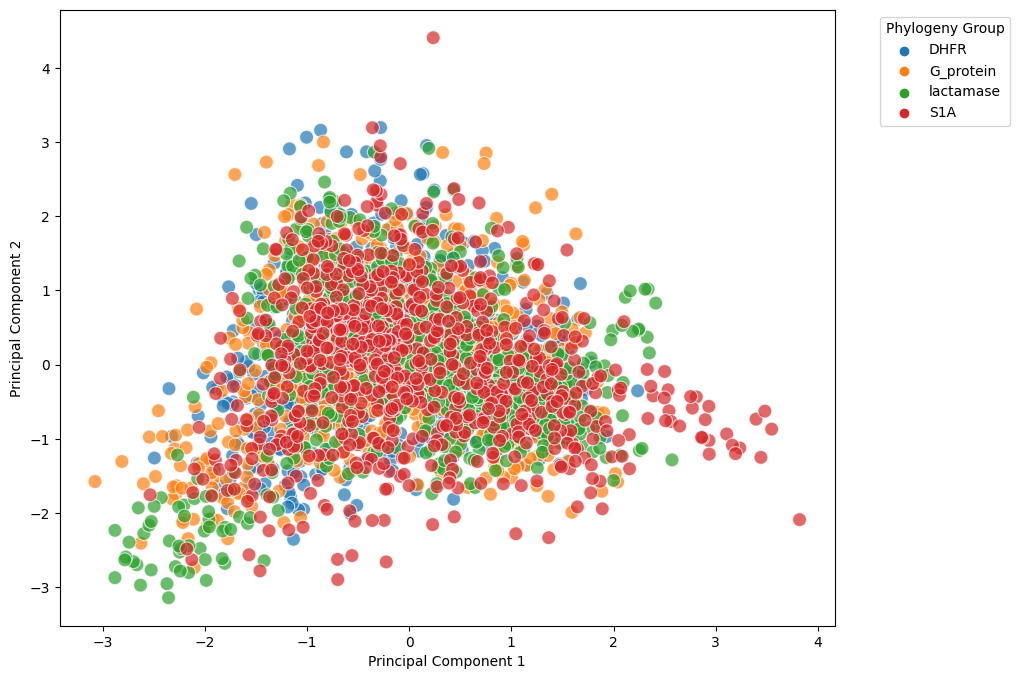

In [29]:
z_columns = ['z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[z_columns])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='family', data=df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()